In [3]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# List available devices
print("Available devices:", tf.config.experimental.list_physical_devices())


Num GPUs Available:  1
Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [33]:
image_dataset_from_directory="C:\\Users\\rohan\\OneDrive\\Desktop\\leaf dataset\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)"

In [34]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\rohan\\OneDrive\\Desktop\\leaf dataset\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [35]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\rohan\\OneDrive\\Desktop\\leaf dataset\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [36]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [23]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

In [37]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization


In [55]:
model = Sequential()

In [56]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

In [57]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

In [58]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

In [59]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

In [60]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

In [61]:
model.add(Dropout(0.25)) ##to avoide overfitting

In [62]:
model.add(Flatten())

In [63]:
model.add(Dense(units=1500,activation='relu'))

In [64]:
model.add(Dropout(0.4)) ##to avoide over fitting

In [65]:
model.add(Dense(units=38,activation='softmax'))

In [66]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_29 (Bat  (None, 128, 128, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_45 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 batch_normalization_30 (Bat  (None, 126, 126, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                      

In [68]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                 patience=3, 
                                 verbose=1, 
                                 factor=0.5, 
                                 min_lr=0.00001)

In [70]:

training_history = model.fit(x=training_set, validation_data=validation_set, epochs=15,callbacks=[lr_reduction])


Epoch 1/15
2197/2197 [==============================] - 369s 168ms/step - loss: 0.9762 - accuracy: 0.7061 - val_loss: 0.3692 - val_accuracy: 0.8816 - lr: 1.0000e-04
Epoch 2/15
2197/2197 [==============================] - 386s 176ms/step - loss: 0.3939 - accuracy: 0.8728 - val_loss: 0.2746 - val_accuracy: 0.9117 - lr: 1.0000e-04
Epoch 3/15
2197/2197 [==============================] - 387s 176ms/step - loss: 0.2449 - accuracy: 0.9198 - val_loss: 0.2586 - val_accuracy: 0.9167 - lr: 1.0000e-04
Epoch 4/15
2197/2197 [==============================] - 386s 176ms/step - loss: 0.1724 - accuracy: 0.9426 - val_loss: 0.1206 - val_accuracy: 0.9612 - lr: 1.0000e-04
Epoch 5/15
2197/2197 [==============================] - 388s 176ms/step - loss: 0.1316 - accuracy: 0.9566 - val_loss: 0.3496 - val_accuracy: 0.8950 - lr: 1.0000e-04
Epoch 6/15
2197/2197 [==============================] - 386s 176ms/step - loss: 0.1033 - accuracy: 0.9661 - val_loss: 0.1746 - val_accuracy: 0.9447 - lr: 1.0000e-04
Epoch 7/15

In [71]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 93s 42ms/step - loss: 0.0011 - accuracy: 0.9997


In [72]:
print(train_loss,train_acc)

0.0011140546994283795 0.9996870160102844


In [73]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 24s 43ms/step - loss: 0.0367 - accuracy: 0.9912


In [74]:
print(val_loss,val_acc)

0.03672460839152336 0.9911791682243347


In [75]:
model.save("Improved_trained_model.keras")

In [76]:
training_history.history

{'loss': [0.9761713147163391,
  0.39391058683395386,
  0.2449462115764618,
  0.17241930961608887,
  0.13163956999778748,
  0.10334324091672897,
  0.08673860877752304,
  0.07434847205877304,
  0.0599210187792778,
  0.0551665723323822,
  0.0504816509783268,
  0.04467539116740227,
  0.042205560952425,
  0.03769974783062935,
  0.014118189923465252],
 'accuracy': [0.7060672640800476,
  0.8728074431419373,
  0.9198094010353088,
  0.942627489566803,
  0.9566113948822021,
  0.9660715460777283,
  0.9715626835823059,
  0.9757024049758911,
  0.9801835417747498,
  0.9813784956932068,
  0.9842378497123718,
  0.9852905869483948,
  0.9865850806236267,
  0.9878654479980469,
  0.9951063394546509],
 'val_loss': [0.3691529929637909,
  0.2745894193649292,
  0.25863978266716003,
  0.12061570584774017,
  0.34959614276885986,
  0.1746482253074646,
  0.10840588063001633,
  0.14163146913051605,
  0.07516399025917053,
  0.21265797317028046,
  0.06333118677139282,
  0.1252496987581253,
  0.0861935168504715,
  0.

In [77]:
import json

In [80]:
import json

# Convert the history to a JSON-serializable format
training_history_dict = {key: [float(val) for val in values] for key, values in training_history.history.items()}

# Save the training history to a JSON file
with open("training_hist.json", "w") as f:
    json.dump(training_history_dict, f)


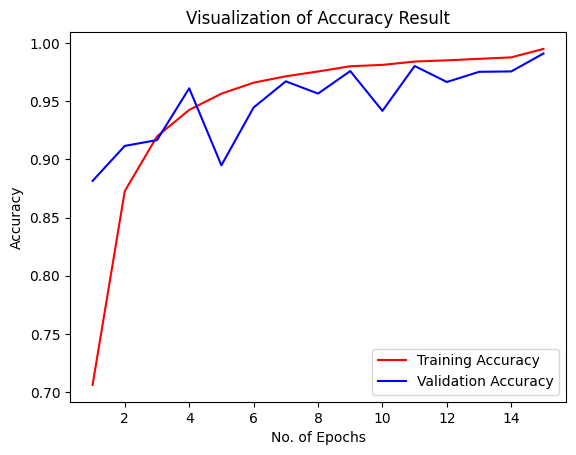

In [81]:
import matplotlib.pyplot as plt

# Assuming training_history is the history object returned by model.fit()
num_epochs = len(training_history.history['accuracy'])
epochs = [i for i in range(1, num_epochs + 1)]

plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()


In [82]:
class_name = validation_set.class_names


In [83]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\rohan\\OneDrive\\Desktop\\leaf dataset\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [84]:

y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)


550/550 [==============================] - 23s 41ms/step


In [85]:
true_categories = tf.concat([y for x, y in test_set], axis=0)



In [86]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true


<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([32, 12,  0, ..., 27,  5, 23], dtype=int64)>

In [ ]:
predicted_categories

In [87]:

from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [88]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.04      0.04      0.04       504
                                 Apple___Black_rot       0.03      0.03      0.03       497
                          Apple___Cedar_apple_rust       0.02      0.02      0.02       440
                                   Apple___healthy       0.05      0.05      0.05       502
                               Blueberry___healthy       0.02      0.02      0.02       454
          Cherry_(including_sour)___Powdery_mildew       0.01      0.01      0.01       421
                 Cherry_(including_sour)___healthy       0.03      0.03      0.03       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.02      0.02      0.02       410
                       Corn_(maize)___Common_rust_       0.03      0.03      0.03       477
               Corn_(maize)___Northern_Leaf_Blight       0.03      0.03      0.

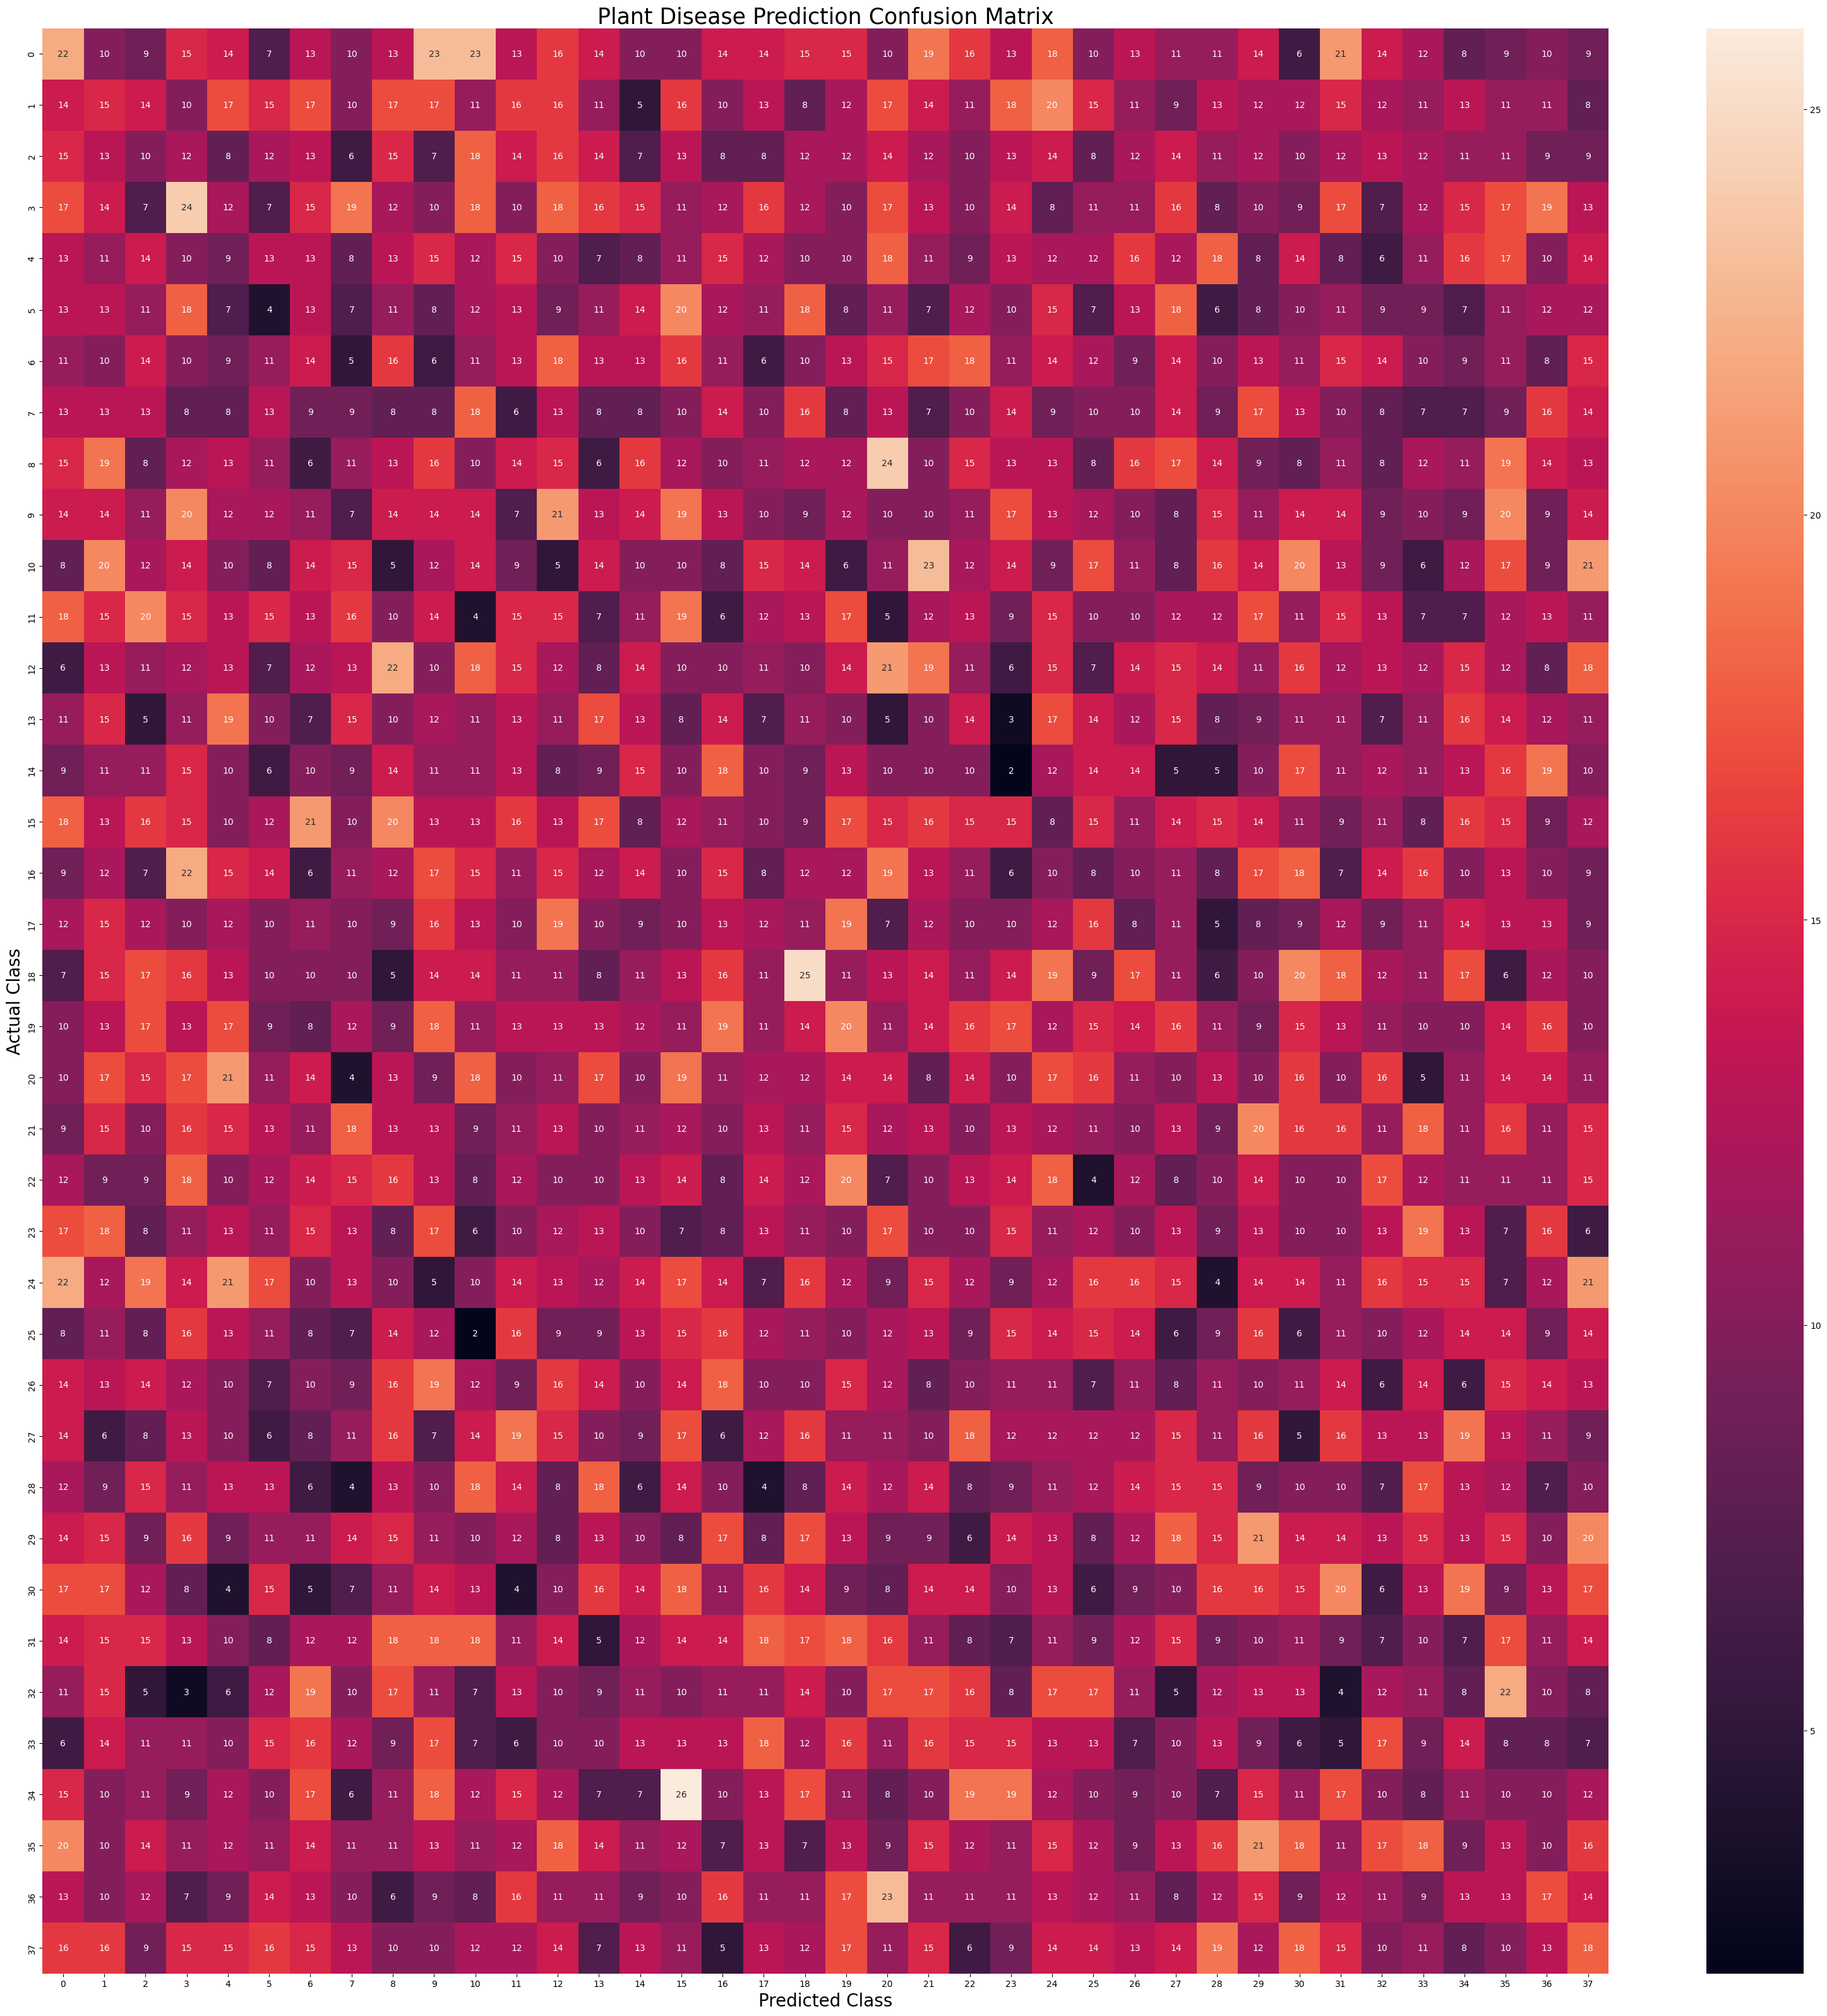

In [89]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()